In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from IPython.display import display
%matplotlib inline
mpl.rcParams['figure.figsize'] = (15, 6)

In [56]:
data1 = pd.read_csv("Anlage1.csv", sep=";", parse_dates=['timestamp'], index_col=['timestamp'])

data = []
for i in range(5):
    data.append(pd.read_csv("Anlage"+str(i+1)+".csv", sep=";", parse_dates=['timestamp']))

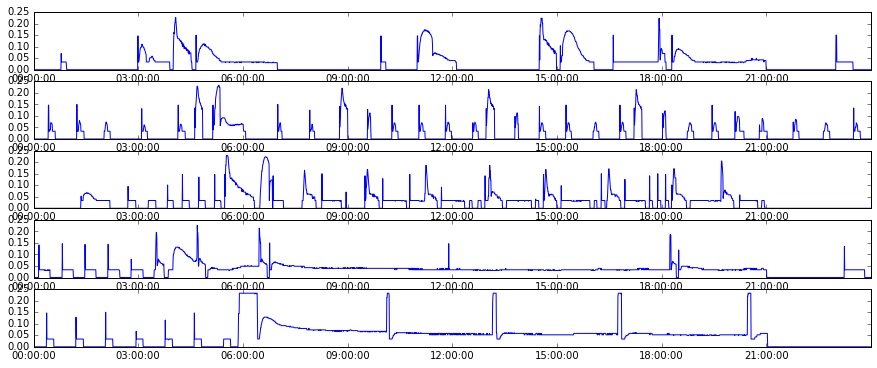

In [49]:
for i in range(5):
    mpl.subplot(5,1,i+1)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['energy_consumption_kwh'][:2880])
mpl.show()

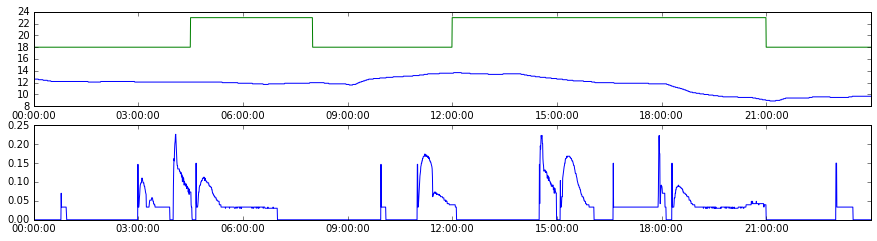

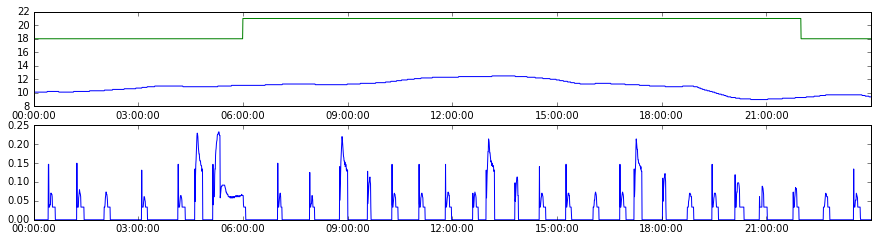

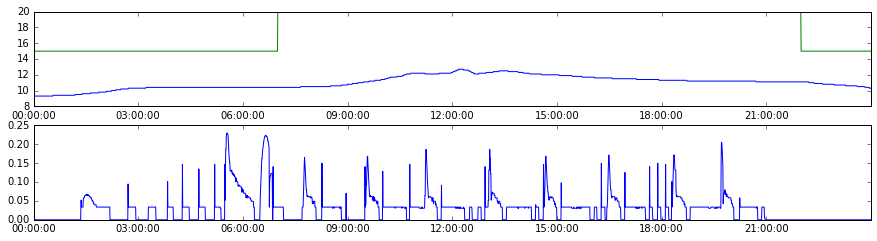

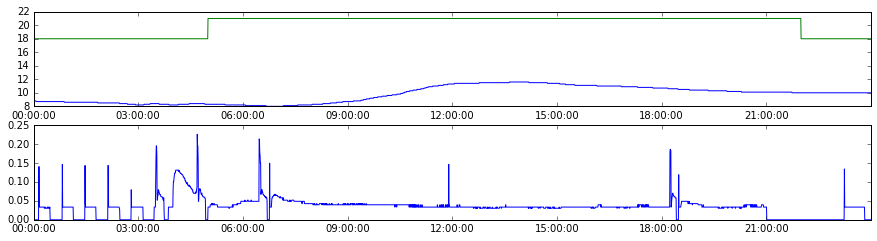

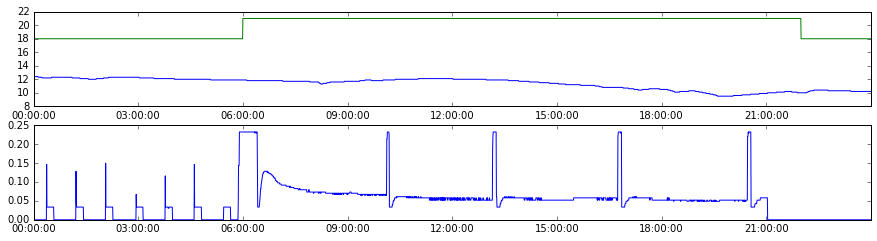

In [50]:
mpl.rcParams['figure.figsize'] = (15, 20)
for i in range(5):
    mpl.subplot(10,1,i*2+1)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['outdoor_temperature_celsius'][:2880])
    mpl.plot(data[i]['timestamp'][:2880], data[i]['indoor_target_temperature_celsius'][:2880])
    mpl.subplot(10,1,i*2+2)
    mpl.plot(data[i]['timestamp'][:2880], data[i]['energy_consumption_kwh'][:2880])
    mpl.show()

In [68]:
gb = data1.groupby(data1.index.date)
df = gb.agg({"outdoor_temperature_celsius": np.mean, "energy_consumption_kwh": np.sum, "indoor_target_temperature_celsius": np.mean, "online_state": np.mean})

,indoor_target_temperature_celsius,online_state,energy_consumption_kwh,outdoor_temperature_celsius
2015-12-18,20.604167,1.000000,81.129917,11.756215
2015-12-19,21.333333,1.000000,101.947653,10.607465
2015-12-20,20.916667,1.000000,49.185566,11.273090
2015-12-21,20.604167,1.000000,86.429033,10.821007
2015-12-22,20.604167,0.727083,76.707105,11.962882
2015-12-23,20.604167,1.000000,75.290200,10.267153
2015-12-24,20.604167,1.000000,85.671580,10.732743
2015-12-25,20.604167,1.000000,66.237417,10.637222
2015-12-26,21.333333,1.000000,40.688656,11.359687
2015-12-27,20.916667,1.000000,62.013396,10.149792


In [ ]:
energy_days = data1['energy_consumption_kwh'].reshape(-1,2880)
thing = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,3)

thing 
#december 18, 2015 is friday
energy_days_sum = energy_days.sum(axis=0)
energy_days_sum

In [ ]:
num_weeks = np.floor(energy_days_sum.shape[0]/7).astype(int)
print(np.floor(num_weeks).astype(int))
num_missing_days = num_weeks*7-energy_days_sum.shape[0]
display(num_weeks)
#energy_sum_weekdays = np.pad(energy_days_sum, pad_width=(0,num_missing_days), mode='constant', constant_values=0)
energy_sum_weekdays = energy_days_sum[:num_weeks*7].reshape(-1,7)
display(energy_sum_weekdays)

energy_weekdays_sum = energy_sum_weekdays.sum(axis=0)
display(energy_weekdays_sum)